In [1]:
import sys
print("Python: {}".format(sys.version))
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import sklearn
from sklearn import linear_model
import statistics

Python: 3.7.3 (default, Apr 24 2019, 15:29:51) [MSC v.1915 64 bit (AMD64)]


In [2]:
train_db = pd.read_csv("tcd ml 2019-20 income prediction training (with labels).csv", index_col = 0)
test_set = pd.read_csv("tcd ml 2019-20 income prediction test (without labels).csv", index_col = 0)
# test_set.isnull().sum()

In [3]:
train_db.head()

,Year of Record,Gender,Age,Country,Size of City,Profession,University Degree,Wears Glasses,Hair Color,Body Height [cm],Income in EUR
Instance,,,,,,,,,,,
1,1997.0,0,41.0,Belarus,1239930,steel workers,Bachelor,0,Blond,193,61031.94416
2,1996.0,other,41.0,Singapore,1603504,safe event coordinator,Master,0,Black,186,91001.32764
3,2018.0,other,28.0,Norway,1298017,receivables/payables analyst,PhD,1,Brown,170,157982.17670
4,2006.0,other,33.0,Cuba,751903,fleet assistant,No,1,Black,171,45993.75793
5,2010.0,female,46.0,United Arab Emirates,95389,lead trainer,0,0,Blond,188,38022.16217


### Description of Dataset

In [4]:
train_db.describe()

,Year of Record,Age,Size of City,Wears Glasses,Body Height [cm],Income in EUR
count,111552.000000,111499.000000,1.119930e+05,111993.000000,111993.000000,1.119930e+05
mean,1999.421274,37.345304,8.388538e+05,0.500531,175.220192,1.092138e+05
std,11.576382,16.036694,2.196879e+06,0.500002,19.913889,1.498024e+05
min,1980.000000,14.000000,7.700000e+01,0.000000,94.000000,-5.696906e+03
25%,1989.000000,24.000000,7.273400e+04,0.000000,160.000000,3.077169e+04
50%,1999.000000,35.000000,5.060920e+05,1.000000,174.000000,5.733917e+04
75%,2009.000000,48.000000,1.184501e+06,1.000000,190.000000,1.260936e+05
max,2019.000000,115.000000,4.999251e+07,1.000000,265.000000,5.285252e+06


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)

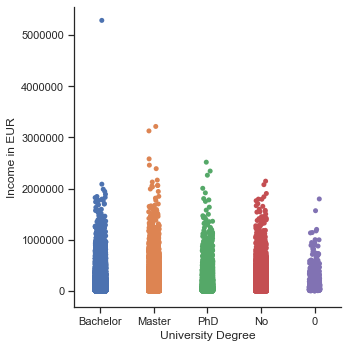

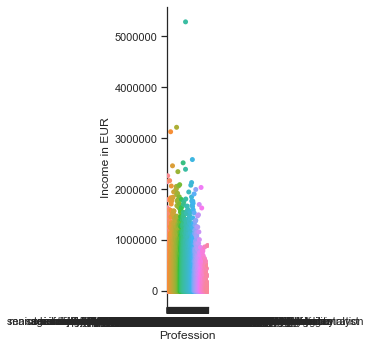

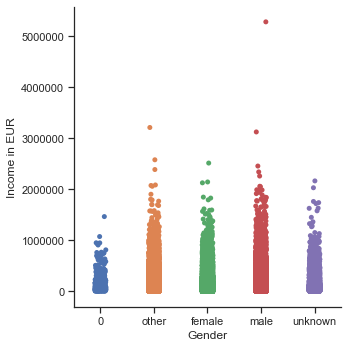

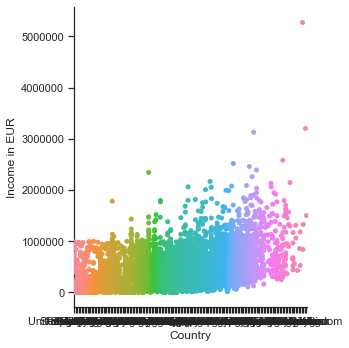

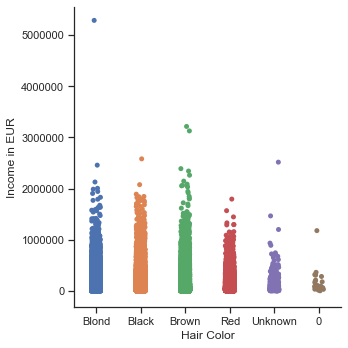

In [6]:
sns.catplot(x="University Degree", y="Income in EUR", data=train_db)
sns.catplot(x="Profession", y="Income in EUR", data=train_db)
sns.catplot(x="Gender", y="Income in EUR", data=train_db)
sns.catplot(x="Country", y="Income in EUR", data=train_db)
sns.catplot(x="Hair Color", y="Income in EUR", data=train_db)

### One Hot Encoding for non numerical data

In [7]:
train_db["train"] = 1
test_set["train"] = 0
train_db = pd.concat([train_db,test_set])

C:\Users\vansh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
train_db["Year of Record"] = train_db["Year of Record"].fillna(statistics.mode(train_db['Year of Record']))
train_db["Age"] = train_db["Age"].fillna(statistics.mode(train_db['Age']))

1. **Gender**

In [9]:
train_db["Gender"] = train_db["Gender"].fillna(statistics.mode(train_db.Gender))
dfDummies = pd.get_dummies(train_db["Gender"], prefix = 'gender')
dfDummies.sum()

gender_0           1179
gender_female     44913
gender_male       83262
gender_other      44674
gender_unknown    11195
dtype: int64

In [10]:
train_db = pd.concat([train_db, dfDummies], axis=1)
train_db = train_db.drop(columns=["Gender"])

2. **Country**

In [11]:
train_db["Country"] = train_db["Country"].fillna(statistics.mode(train_db.Country))
dfDummies = pd.get_dummies(train_db["Country"], prefix = 'country')
dfDummies.sum().tail()

country_Venezuela     159
country_Vietnam         1
country_Yemen         105
country_Zambia        790
country_Zimbabwe     1437
dtype: int64

In [12]:
train_db = pd.concat([train_db, dfDummies], axis=1)
train_db = train_db.drop(columns=["Country"])

3. **Profession**

In [13]:
train_db["Profession"] = train_db["Profession"].fillna(statistics.mode(train_db.Profession))
dfDummies = pd.get_dummies(train_db["Profession"], prefix = 'profession')
dfDummies.sum().tail()

profession_workforce planning intern         42
profession_writer                            50
profession_x-ray technician                  47
profession_yardmaster                        31
profession_youth initiatives lead advisor    46
dtype: int64

In [14]:
train_db = pd.concat([train_db, dfDummies], axis=1)
train_db = train_db.drop(columns=["Profession"])

4. **University Degree**

In [15]:
train_db["University Degree"] = train_db["University Degree"].fillna(statistics.mode(train_db['University Degree']))
dfDummies = pd.get_dummies(train_db["University Degree"], prefix = 'degree')
dfDummies.sum().tail()

degree_0            1156
degree_Bachelor    83313
degree_Master      44831
degree_No          44697
degree_PhD         11226
dtype: int64

In [16]:
train_db = pd.concat([train_db, dfDummies], axis=1)
train_db = train_db.drop(columns=["University Degree"])

5. **Hair Color**

In [17]:
train_db["Hair Color"] = train_db["Hair Color"].fillna(statistics.mode(train_db['Hair Color']))
dfDummies = pd.get_dummies(train_db["Hair Color"], prefix = 'haircolor')
dfDummies.sum().tail()

haircolor_Black      83205
haircolor_Blond      44645
haircolor_Brown      44920
haircolor_Red        11335
haircolor_Unknown     1073
dtype: int64

In [18]:
train_db = pd.concat([train_db, dfDummies], axis=1)
train_db = train_db.drop(columns=["Hair Color"])

In [19]:
train_db.tail()

,Age,Body Height [cm],Income,Income in EUR,Size of City,Wears Glasses,Year of Record,train,gender_0,gender_female,...,degree_Bachelor,degree_Master,degree_No,degree_PhD,haircolor_0,haircolor_Black,haircolor_Blond,haircolor_Brown,haircolor_Red,haircolor_Unknown
Instance,,,,,,,,,,,,,,,,,,,,,
185219,37.0,203,NaN,NaN,62975,0,2012.0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
185220,42.0,181,NaN,NaN,46819,0,2016.0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
185221,50.0,162,NaN,NaN,525072,1,2019.0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
185222,54.0,162,NaN,NaN,915892,1,1980.0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
185223,41.0,197,NaN,NaN,62607,0,2017.0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [20]:
train_db.head()

,Age,Body Height [cm],Income,Income in EUR,Size of City,Wears Glasses,Year of Record,train,gender_0,gender_female,...,degree_Bachelor,degree_Master,degree_No,degree_PhD,haircolor_0,haircolor_Black,haircolor_Blond,haircolor_Brown,haircolor_Red,haircolor_Unknown
Instance,,,,,,,,,,,,,,,,,,,,,
1,41.0,193,NaN,61031.94416,1239930,0,1997.0,1,1,0,...,1,0,0,0,0,0,1,0,0,0
2,41.0,186,NaN,91001.32764,1603504,0,1996.0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
3,28.0,170,NaN,157982.17670,1298017,1,2018.0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
4,33.0,171,NaN,45993.75793,751903,1,2006.0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
5,46.0,188,NaN,38022.16217,95389,0,2010.0,1,0,1,...,0,0,0,0,0,0,1,0,0,0


In [21]:
train = train_db[train_db["train"] ==1].drop(columns=["Income in EUR","Income", "train"], axis =1)
test = train_db[train_db["train"] ==0].drop(columns=["Income in EUR","Income", "train"], axis =1)
train_income = train_db[train_db["train"] ==1]["Income in EUR"]

In [22]:
test.head()

,Age,Body Height [cm],Size of City,Wears Glasses,Year of Record,gender_0,gender_female,gender_male,gender_other,gender_unknown,...,degree_Bachelor,degree_Master,degree_No,degree_PhD,haircolor_0,haircolor_Black,haircolor_Blond,haircolor_Brown,haircolor_Red,haircolor_Unknown
Instance,,,,,,,,,,,,,,,,,,,,,
111994,21.0,153,391652,1,1992.0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
111995,34.0,163,33653,0,1986.0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
111996,53.0,153,34765,1,1994.0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
111997,29.0,154,1494132,0,1984.0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
111998,17.0,191,120661,0,2007.0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0


In [23]:
train["Year of Record"] = train["Year of Record"].fillna(statistics.mode(train['Year of Record']))
train["Age"] = train["Age"].fillna(statistics.mode(train['Age']))
# train.isnull().sum()

####################################################
## MODEL CREATION ##

In [24]:
from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(train, train_income, test_size=0.3)

In [25]:
model = linear_model.LinearRegression()
lmodel = model.fit(train, train_income)

In [26]:
y_pred = lmodel.predict(test)

# from sklearn.metrics import mean_squared_error
# from math import sqrt

# print("Training set prediction error: {}".format(sqrt(mean_squared_error(y_valid, y_pred))))

In [30]:
csv_pred = pd.DataFrame(y_pred).rename(columns={0:"Income"})

In [32]:
csv_pred.head()

,Income
0,26513.228917
1,-32380.357196
2,45828.513053
3,169534.173142
4,5551.777255


In [31]:
# test_set = pd.read_csv("tcd ml 2019-20 income prediction test (without labels).csv", index_col = 0)
# test_set.isnull().sum()

Year of Record         295
Gender                4862
Age                    279
Country                  0
Size of City             0
Profession             195
University Degree     4857
Wears Glasses            0
Hair Color            4916
Body Height [cm]         0
Income               73230
dtype: int64

In [46]:
# test_set["Year of Record"] = test_set["Year of Record"].fillna(statistics.mode(test_set["Year of Record"]))
# test_set["Gender"] = test_set["Gender"].fillna(statistics.mode(test_set.Gender))
# test_set["University Degree"] = test_set["University Degree"].fillna(statistics.mode(test_set["University Degree"]))
# test_set["Hair Color"] = test_set["Hair Color"].fillna(statistics.mode(test_set["Hair Color"]))
# test_set["Age"] = test_set["Age"].fillna(statistics.mode(test_set.Age))
# test_set["Profession"] = test_set["Profession"].fillna(test_set["Profession"].mode()[0])

In [47]:
test_set.isnull().sum()

0    program executive
dtype: object


Year of Record           0
Gender                   0
Age                      0
Country                  0
Size of City             0
Profession               0
University Degree        0
Wears Glasses            0
Hair Color               0
Body Height [cm]         0
Income               73230
dtype: int64

In [95]:
dfDummies = pd.get_dummies(test_set["Gender"], prefix = 'gender')
test_set = pd.concat([test_set, dfDummies], axis=1)
dfDummies = pd.get_dummies(test_set["Country"], prefix = 'country')
test_set = pd.concat([test_set, dfDummies], axis=1)
dfDummies = pd.get_dummies(test_set["Profession"], prefix = 'profession')
test_set = pd.concat([test_set, dfDummies], axis=1)
dfDummies = pd.get_dummies(test_set["University Degree"], prefix = 'degree')
test_set = pd.concat([test_set, dfDummies], axis=1)
dfDummies = pd.get_dummies(test_set["Hair Color"], prefix = 'haircolor')
test_set = pd.concat([test_set, dfDummies], axis=1)
test_set = test_set.drop(columns=["Gender", "Country", "Profession", "University Degree", "Hair Color", "Income"])

KeyError: 'Gender'

In [96]:
print(test_set.columns)
X_train.columns

Index(['Year of Record', 'Age', 'Size of City', 'Wears Glasses',
       'Body Height [cm]', 'Gender_0', 'Gender_female', 'Gender_male',
       'Gender_other', 'Gender_unknown',
       ...
       'degree_Bachelor', 'degree_Master', 'degree_No', 'degree_PhD',
       'haircolor_0', 'haircolor_Black', 'haircolor_Blond', 'haircolor_Brown',
       'haircolor_Red', 'haircolor_Unknown'],
      dtype='object', length=1503)


Index(['Year of Record', 'Age', 'Size of City', 'Wears Glasses',
       'Body Height [cm]', 'gender_0', 'gender_female', 'gender_male',
       'gender_other', 'gender_unknown',
       ...
       'degree_Bachelor', 'degree_Master', 'degree_No', 'degree_PhD',
       'haircolor_0', 'haircolor_Black', 'haircolor_Blond', 'haircolor_Brown',
       'haircolor_Red', 'haircolor_Unknown'],
      dtype='object', length=1521)

In [90]:
test_set.drop(columns = (test_set.columns.subtract(X_train.columns)))

AttributeError: 'Index' object has no attribute 'subtract'

In [56]:
y_pred = lmodel.predict(test_set)
len(y_pred) #73230

ValueError: shapes (73230,1503) and (1521,) not aligned: 1503 (dim 1) != 1521 (dim 0)

In [64]:
csv_valid = pd.DataFrame(y_pred)

In [68]:
csv_valid["Instance"] = csv_valid.index

In [77]:
csv_valid = csv_valid.rename(columns={0:"Income"})

In [78]:
csv_valid.head()

,Income,Instance
0,27999.049160,0
1,-21466.659489,1
2,-11432.148236,2
3,169246.543387,3
4,59068.993598,4


In [35]:
submit = pd.read_csv("tcd ml 2019-20 income prediction submission file.csv", index_col= 0)

In [37]:
submit["Income"] = y_pred

In [38]:
submit.head()

,Income
Instance,
111994,26513.228917
111995,-32380.357196
111996,45828.513053
111997,169534.173142
111998,5551.777255


In [41]:
submit.to_csv(r"C:\Users\vansh\TCD MAI\Machine Learning\IndividualAssignment\prediction.csv", index = True)

In [13]:
train_db["Age"].isnull().sum() #494

494

KeyboardInterrupt: 

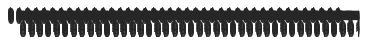

In [21]:
# train_db.plot(kind = 'box', subplots=True, layout= (300,40), sharex= False, sharey=False)
# plt.show()

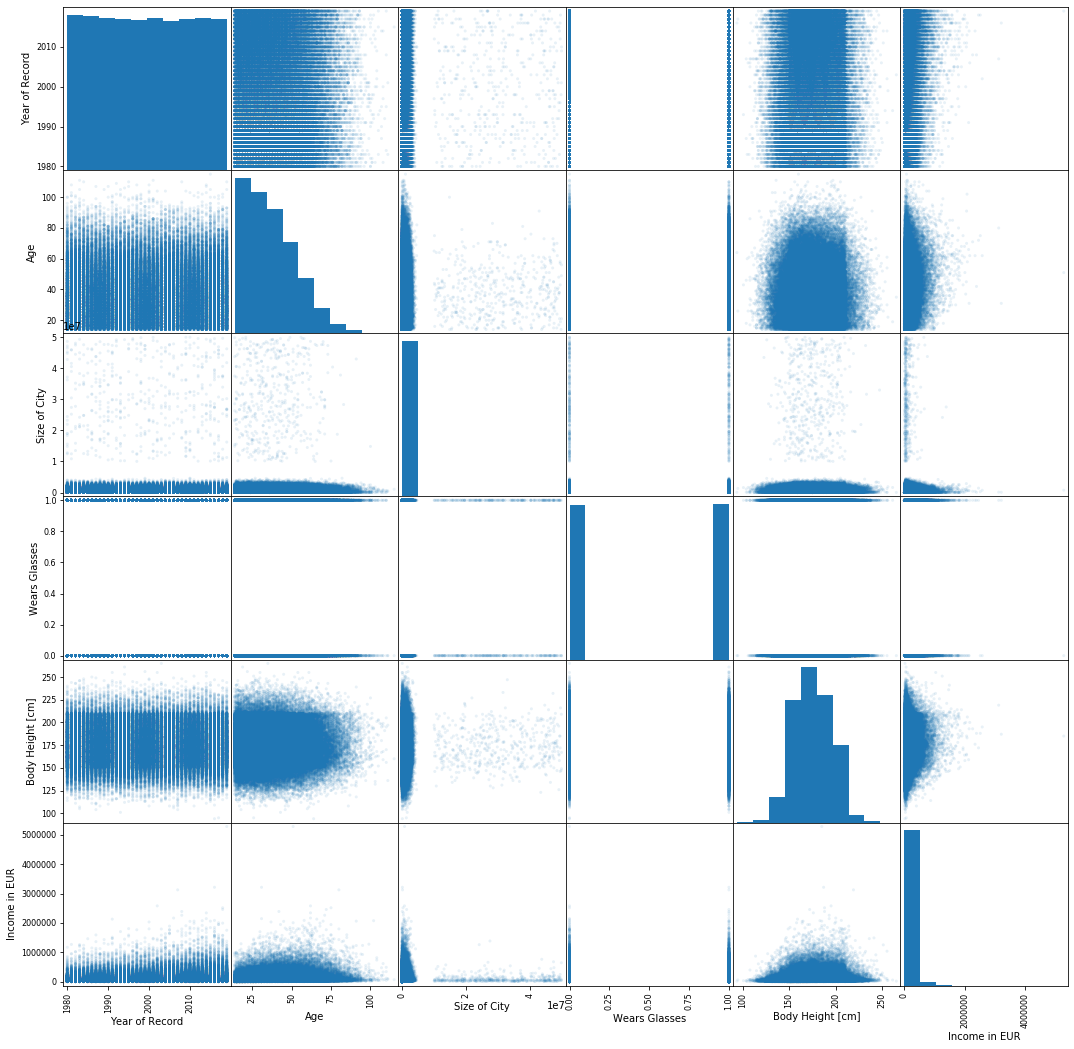

In [27]:
# scatter_matrix(train_db, figsize=(18, 18), alpha=0.1)
# plt.show()